In [360]:
import pandas as pd
import numpy as np
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"
df=pd.read_csv(url)

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.head() 
# DataSet Ready!

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [361]:
df.price = pd.to_numeric(df.price, errors='coerce').fillna(0).astype(np.int64) 
df.horsepower = pd.to_numeric(df.horsepower, errors='coerce').fillna(0).astype(np.int64) 

In [362]:
#Model Evalutaion
from sklearn.model_selection import train_test_split 
# For model evaluation, import train_test_split (training and testing data , 2 sets will be created)

In [363]:
x_data=df[['highway-mpg']]
y_data = df['price']
# Define target and predictor variables i.e. y and x

In [378]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=0)
# Use train_test_split for model evaluation split data into training and testing sets where 30% is for training set
# Random_state=0 for producing different results on execution of the function

In [365]:
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

number of test samples : 62
number of training samples: 142


In [366]:
# Cross validation to reduce precision and accuracy problems in generalization error
from sklearn.model_selection import cross_val_score # Import cross_val_score function for cross validation 

In [367]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()# Declare lr object for use in the next statement

In [368]:
scores=cross_val_score(lr,x_data,y_data,cv=3)# cv=3 meaning 3 partitions i.e. 3 fold data set for trg and testing
print(scores)

[0.47489091 0.45261793 0.04826532]


In [369]:
print("The mean of the folds are", scores.mean(), "and the standard deviation is" , scores.std())
# Calculating avg and std dev of our estimate

The mean of the folds are 0.32525805533573715 and the standard deviation is 0.19607439465533547


In [370]:
from sklearn.model_selection import cross_val_predict 
# The previous cross validation method predicts after calculating R^2
# Using cross_val_predict , we get our values before R^2 is calculated

In [371]:
from sklearn.linear_model import LinearRegression 
lr2e=LinearRegression()
yhat=cross_val_predict(lr2e,x_data,y_data,cv=3)# lr2 new object defined function cross_val_predict used
print(yhat)

[15654.89099443 16463.34250221 13229.53647109 19697.14853333
 17271.79400999 17271.79400999 17271.79400999 21314.05154888
 19697.14853333 14037.98797887 14037.98797887 14846.43948665
 14846.43948665 17271.79400999 19697.14853333 19697.14853333
 21314.05154888 -5364.84820785  2719.66686995  2719.66686995
  4336.56988551  6761.92440885 13229.53647109  6761.92440885
  6761.92440885  6761.92440885 13229.53647109 13229.53647109
 18080.24551777 -6173.29971562  6761.92440885  3528.11837773
  9995.73043997  9995.73043997  9995.73043997  9995.73043997
 10804.18194775 10804.18194775 10804.18194775 10804.18194775
 14846.43948665 12421.08496331 14037.98797887  2719.66686995
  2719.66686995 14037.98797887 22122.50305666 22122.50305666
 23739.40607222 12421.08496331  6761.92440885  6761.92440885
  6761.92440885  6761.92440885 18888.69702555 18888.69702555
 18888.69702555 18888.69702555 11612.63345553 11612.63345553
 11612.63345553 11612.63345553  3528.11837773 11612.63345553
 15654.89099443  5953.47

In [384]:
#Overfitting, underfitting and model selection
lm=LinearRegression() # Creating an object lm
from sklearn.preprocessing import PolynomialFeatures # import this for higher order expressions

In [385]:
Rsqu_test=[] # Create empty list to store values
order=[1,2,3,4] # Create list containing different polynomial orders

In [386]:
for n in order: # Run a loop
    pr=PolynomialFeatures(degree=n)# Create a polynomial features object with order as a parameter
    x_train_pr=pr.fit_transform(x_train[['horsepower']]) # Transform training data into polynomial
    x_test_pr=pr.fit_transform(x_test[['horsepower']]) # Transform test data into polynomial
    lm.fit(x_train_pr,y_train) # Fit the regression model using transformed data
    Rsqu_test.append(lm.score(x_test_pr,y_test)) #Calculate R^2 values using test data and store them in the list

Text(3, 0.75, 'Maximum R^2 ')

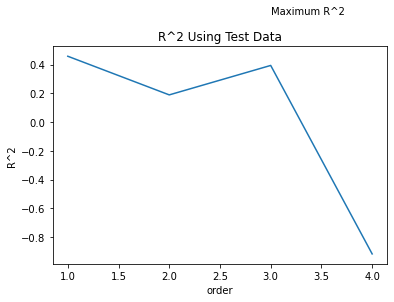

In [387]:
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')  
#As order increases R^2 increases and reaches optimum value at 3 then drastically decreases

In [422]:
# Ridge Regression
from sklearn.linear_model import Ridge # import ridge from sklearn.linear_model 

In [423]:
X=df[['highway-mpg']]
y=df['price']

In [424]:
RigeModel=Ridge(alpha=0.1) # Create a ridge object using the constructor with the alpha value as a parameter

In [425]:
RigeModel.fit(X,y) # Train the model 

Ridge(alpha=0.1)

In [426]:
yhat=RigeModel.predict(X) #Predict!
yhat 

array([15991.56868119, 16799.29561352, 13568.3878842 , 20030.20334284,
       17607.02254585, 17607.02254585, 17607.02254585, 21645.6572075 ,
       20030.20334284, 14376.11481653, 14376.11481653, 15183.84174886,
       15183.84174886, 17607.02254585, 20030.20334284, 20030.20334284,
       21645.6572075 , -5009.33155941,  3067.9377639 ,  3067.9377639 ,
        4683.39162856,  7106.57242555, 13568.3878842 ,  7106.57242555,
        7106.57242555,  7106.57242555, 13568.3878842 , 13568.3878842 ,
       18414.74947818, -5817.05849174,  7106.57242555,  3875.66469623,
       10337.48015487, 10337.48015487, 10337.48015487, 10337.48015487,
       11145.2070872 , 11145.2070872 , 11145.2070872 , 11145.2070872 ,
       15183.84174886, 12760.66095187, 14376.11481653,  3067.9377639 ,
        3067.9377639 , 14376.11481653, 22453.38413983, 22453.38413983,
       24068.83800449, 12760.66095187,  7106.57242555,  7106.57242555,
        7106.57242555,  7106.57242555, 19222.47641051, 19222.47641051,
      

In [427]:
# Grid Search
from sklearn.model_selection import GridSearchCV
#Import GridSearchCV

In [428]:
parameters1=[{'alpha':[0.001,0.1,1,10,100,1000,10000,100000,1000000]}] 
parameters1
#Defining a list containing dictionary which has alpha (hyperpar.) as the key and it's values as values

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]

In [430]:
RR=Ridge()
RR
# Creating object 

Ridge()

In [431]:
Grid1=GridSearchCV(RR,parameters1,cv=4) 
# Grid Search CV object created with inputs as the model,the hyperparameters and the scoring method i.e. folds (R^2)

In [433]:
Grid1.fit(x_data[['horsepower','curb-weight','engine-size','highway-mpg']],y_data) 
#Fit/Train the model

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}])

In [237]:
df.horsepower = pd.to_numeric(df.horsepower, errors='coerce').fillna(0).astype(np.int64) 


In [441]:
BestRR=Grid1.best_estimator_# Find best values of the free parameters using attribute best_estimator_

In [442]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)
# We test our model on the test data

0.7013794313064958

In [443]:
scores=Grid1.cv_results_
scores['mean_test_score']
# Additional info can be obtained like getting the mean score on the validation data 

array([0.62523347, 0.62523497, 0.62524866, 0.62538441, 0.62664023,
       0.63331572, 0.63675224, 0.60678915, 0.55270701])

In [444]:
#For testing multiple parameters by Grid Search CV
parameters2=[{'alpha':[0.001,0.1,1,10,100],'normalize':[True,False]}] # Normalize hyperparameter added in list as dict
parameters2

[{'alpha': [0.001, 0.1, 1, 10, 100], 'normalize': [True, False]}]

In [446]:
RR1=Ridge() # Creating object 
RR1

Ridge()

In [447]:
Grid1=GridSearchCV(RR1,parameters2,cv=4)
# Grid Search CV object created with inputs as the model,the hyperparameters and the scoring method i.e. folds (R^2)

In [448]:
Grid1.fit(x_data[['horsepower','curb-weight','engine-size','highway-mpg']],y_data) 
#Fit/Train the model

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100],
                          'normalize': [True, False]}])

In [450]:
BestRR1=Grid1.best_estimator_ # Find best values of the free parameters using attribute best_estimator_
BestRR1

Ridge(alpha=0.1, normalize=True)

In [451]:
BestRR1.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)
# We test our model on the test data

0.7087246264164371

In [452]:
scores=Grid1.cv_results_
scores['mean_test_score']
# Additional info can be obtained like getting the mean score on the validation data 

array([0.62590948, 0.62523347, 0.64839073, 0.62523497, 0.62393443,
       0.62524866, 0.29007688, 0.62538441, 0.02110777, 0.62664023])

In [453]:
for param,mean_val,mean_test inzip(scores['params'],scores['mean_test_scores'],scores['mean_train_score']):
    print(param,"R^2 on test data:",mean_val,"R^2 on train data:",mean_test)

SyntaxError: invalid syntax (<ipython-input-453-2ec577f7a7ea>, line 1)